# Image augmentation tutorial

## Actions

- [crop](#Crop)
- [flip](#Flip)
- [rotate](#Rotate)
- [resize](#Resize)
- [scale](#Scale)
- [pad](#Pad)
- [invert](#Invert)
- [multiply](#Multiply)
- [add](#Add)
- [salt](#Salt)
- [put_on_background](#Put_on_background)

In each section you will see examples of transformations that are performed by the choosen action. The section itself consists of several cells. Every cell has only one function invoking: ``plot_examples``. The first two arguments are not important, others are responsible for different parameters passed to an action. Action itself is perfomed with every item in the parameter's list. For example:

``
plot_examples(title = 'crop',
              action = lambda batch, **params: batch.crop(**params),
              origin = ['center', 'top_left', (14, 0), (0, 14)],
              shape = [(14, 14), (18, 18), (14, 24), (24, 14)])
``

in the [crop](#Crop) section will first invoke ``crop(origin='center', shape=(14,14)``, then  ``crop(origin='top_left', shape=(18,18)`` and etc. For every invocation two images are drawn in a line: before and after an action.


## Pipeline example

This section provides information about using actions in a pipeline

- [Pipeline example](#Pipeline-example)





In [1]:
%matplotlib inline

import sys
import os
import numpy as np
from matplotlib import pyplot as plt

sys.path.append(os.path.abspath('../..'))

import dataset as ds
from dataset.opensets import CIFAR10
from dataset import B, V, C, F, R, P
from dataset.models.tf import ResNet18
from dataset import Pipeline
from dataset import ImagesBatch


def show_img(axis, image, title):
    axis.imshow(image)
    axis.set_title(title, fontsize=12)
    axis.tick_params(bottom='off', labelbottom='off', left='off', labelleft='off')

def plot_examples(title, action, title_action=True, **params):
    num_plots = 2 * len(list(params.values())[0])
    f, a = plt.subplots(1, num_plots, figsize=(16, 3))
    for i in range(num_plots // 2):
        batch = cifar_ds.train.next_batch(2)
        current_params = {k : v[i] for k, v in params.items()}
        show_img(a[i*2], batch.images[0].squeeze(), 'original')
        action(batch, **current_params)
        if title_action:
            title_action = '\n'.join((str(k)+'=' + str(v if not callable(v) else 'sampler') for k, v in current_params.items()))        
        else:
            title_action = ''
        show_img(a[i*2+1], batch.images[0].squeeze(), title_action)
    plt.suptitle(title, fontsize=18)

PATH_TO_CIFAR = '/home/grisha/work/az_training/gregory_ivanov/task_02/'   

cifar_ds = CIFAR10(batch_class=ImagesBatch, path=PATH_TO_CIFAR)

/home/grisha/anaconda3/envs/tf/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Extracting...
Extracted


# Crop

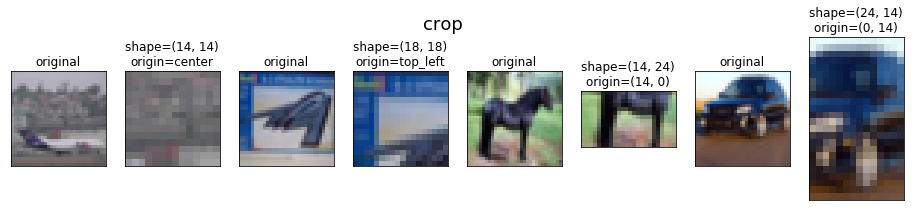

In [2]:
plot_examples(title = 'crop',
              action = lambda batch, **params: batch.crop(**params),
              origin = ['center', 'top_left', (14, 0), (0, 14)],
              shape = [(14, 14), (18, 18), (14, 24), (24, 14)])

##  Crop at random origin

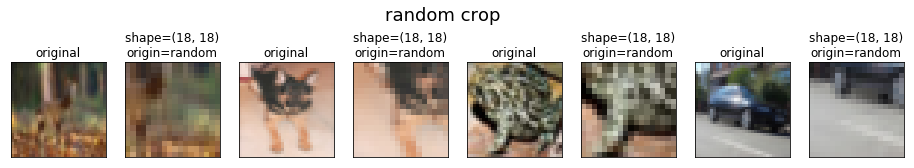

In [3]:
plot_examples(title = 'random crop',
              action = lambda batch, **params: batch.crop(**params),
              shape = [(18, 18)]*4,
              origin = ['random']*4)

# Flip

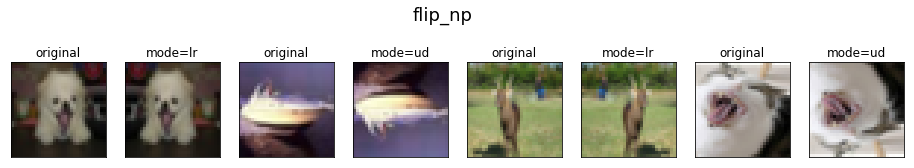

In [4]:
plot_examples(title = 'flip_np',
              action = lambda batch, **params: batch.flip(**params),
              mode = ['lr', 'ud', 'lr', 'ud'])

# Rotate

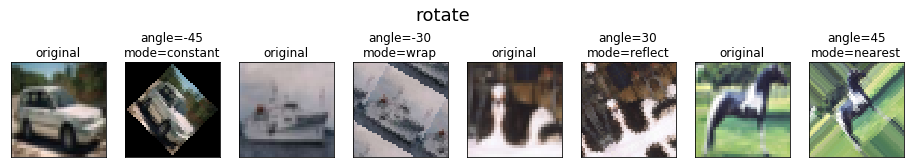

In [5]:
plot_examples(title = 'rotate',
              action = lambda batch, **params: batch.rotate(**params),
              angle = [-45, -30, 30, 45],
              mode = ['constant', 'wrap', 'reflect', 'nearest'])

# Resize

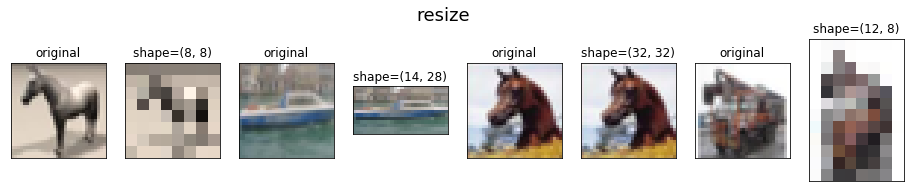

In [6]:
plot_examples(title = 'resize',
              action = lambda batch, **params: batch.resize(**params),
              shape = [(8, 8), (14, 28), (32, 32), (12, 8)])

# Scale

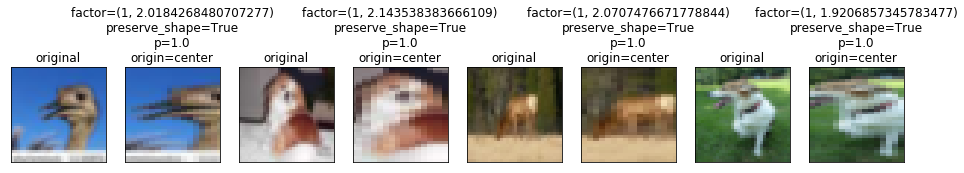

In [7]:
factor_sampler = lambda: (1, 1+2*np.random.beta(5,5))

plot_examples(title = '',
              action = lambda batch, **params: batch.scale(**params),
              p = [1.]*4,
              factor=[factor_sampler() for i in range(4)],
              preserve_shape=[True]*4,
              origin=['center']*4)

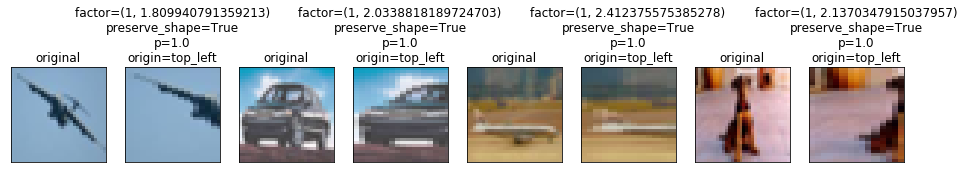

In [8]:
plot_examples(title = '',
              action = lambda batch, **params: batch.scale(**params),
              p = [1.]*4,
              factor=[factor_sampler() for i in range(4)],
              preserve_shape=[True]*4,
              origin=['top_left']*4)

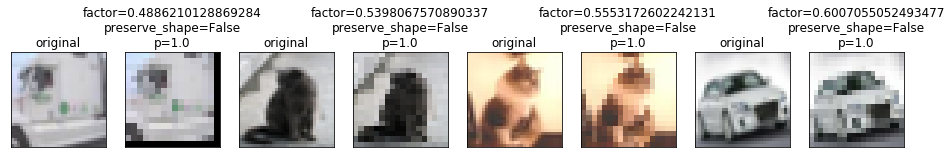

In [9]:
factor_sampler =  lambda: 0.3 + 0.4 * np.random.beta(5,5)

plot_examples(title = '',
              action = lambda batch, **params: batch.scale(**params),
              p = [1.]*4,
              factor=[factor_sampler() for i in range(4)],
              preserve_shape=[False]*4)

/home/grisha/work/dataset/dataset/batch_image.py:449: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  'top_left' if origin != 'center' else 'center',


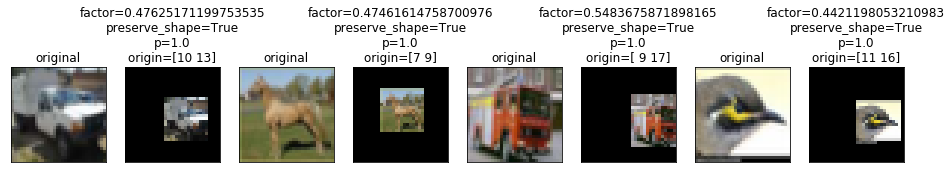

In [10]:
factor_sampler =  lambda: 0.1 + 0.7 * np.random.beta(2,2)
origin_sampler = lambda: (20 * np.random.beta(2,2,2)).astype(np.int)

plot_examples(title = '',
              action = lambda batch, **params: batch.scale(**params),
              p = [1.]*4,
              factor=[factor_sampler() for i in range(4)],
              preserve_shape=[True]*4,
              origin=[origin_sampler() for i in range(4)])

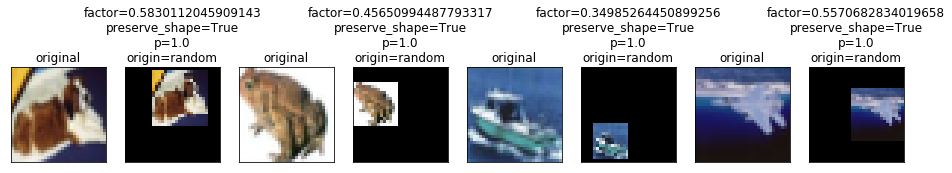

In [11]:
factor_sampler =  lambda: 0.1 + 0.7 * np.random.beta(2,2)

plot_examples(title = '',
              action = lambda batch, **params: batch.scale(**params),
              p = [1.]*4,
              factor=[factor_sampler() for i in range(4)],
              preserve_shape=[True]*4,
              origin=['random']*4)

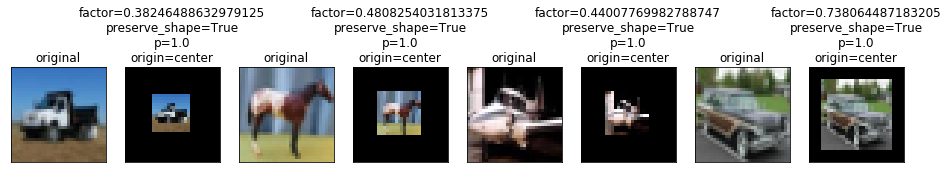

In [12]:
plot_examples(title = '',
              action = lambda batch, **params: batch.scale(**params),
              p = [1.]*4,
              factor=[factor_sampler() for i in range(4)],
              preserve_shape=[True]*4,
              origin=['center']*4)

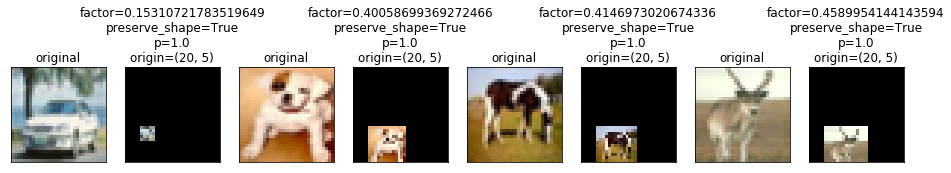

In [13]:
plot_examples(title = '',
              action = lambda batch, **params: batch.scale(**params),
              p = [1.]*4,
              factor=[factor_sampler() for i in range(4)],
              preserve_shape=[True]*4,
              origin=[(20,5)]*4)

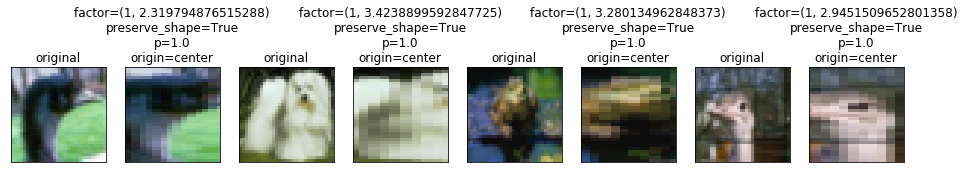

In [14]:
factor_sampler = lambda: (1, 2+2*np.random.beta(5,5))
plot_examples(title = '',
              action = lambda batch, **params: batch.scale(**params),
              p = [1.]*4,
              factor=[factor_sampler() for i in range(4)],
              preserve_shape=[True]*4,
              origin=['center']*4)

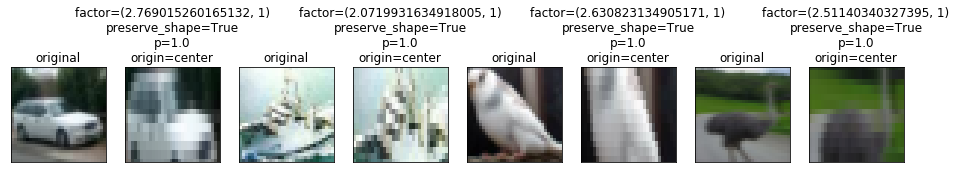

In [15]:
factor_sampler = lambda: (2+np.random.beta(5,5), 1)
plot_examples(title = '',
              action = lambda batch, **params: batch.scale(**params),
              p = [1.]*4,
              factor=[factor_sampler() for i in range(4)],
              preserve_shape=[True]*4,
              origin=['center']*4)

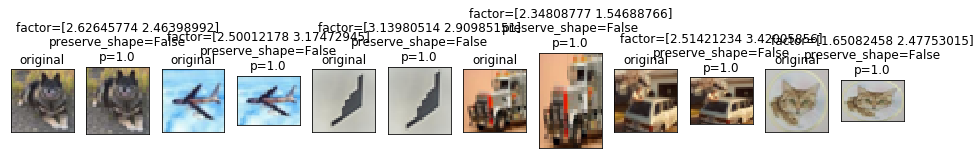

In [16]:
factor_sampler = lambda: (1+3*np.random.beta(2,2,2))
plot_examples(title = '',
              action = lambda batch, **params: batch.scale(**params),
              p = [1.]*6,
              factor=[factor_sampler() for i in range(6)],
              preserve_shape=[False]*6)

# Pad

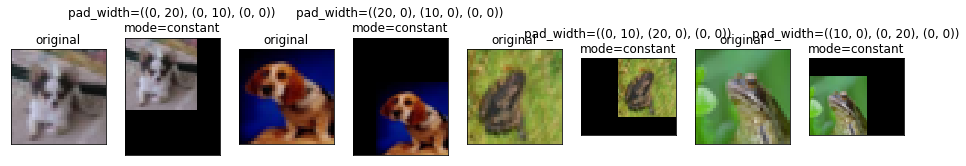

In [17]:
plot_examples(title = '',
              action = lambda batch, **params: batch.pad(**params),
              pad_width=[((0,20),(0,10),(0,0)), ((20,0),(10,0),(0,0)),
                         ((0,10),(20,0),(0,0)), ((10,0),(0,20),(0,0))],
              mode=['constant']*4)

# Invert

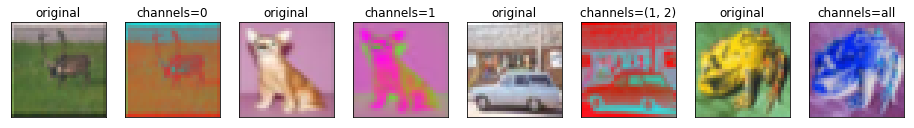

In [18]:
plot_examples(title = '',
              action = lambda batch, **params: batch.invert(**params),
              channels=[0, 1, (1, 2), 'all'])

# THRESHOLD!!!!

In [19]:
??

Object `` not found.


# Multiply

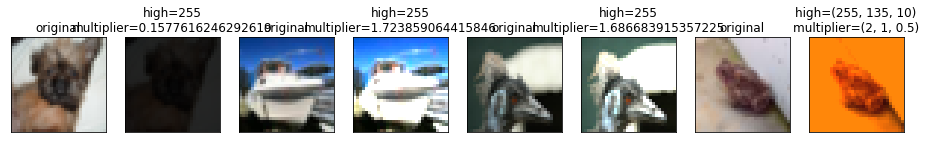

In [20]:
plot_examples(title = '',
              action = lambda batch, **params: batch.multiply(**params),
              multiplier=[2*np.random.random() for i in range(3)] + [(2,1,0.5)],
              high = [255]*3 + [(255, 135, 10)])

# Add

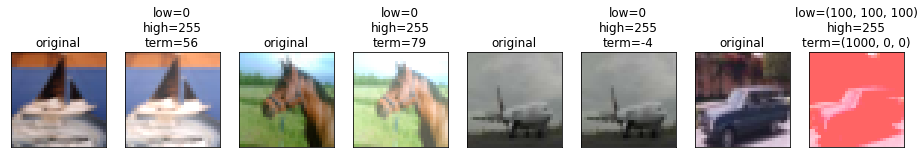

In [21]:
plot_examples(title = '',
              action = lambda batch, **params: batch.add(**params),
              term=[-100+ int(200*np.random.random()) for i in range(3)] + [(1000,0,0)],
              high = [255]*4,
              low = [0]*3 + [(100, 100, 100)])

# Salt

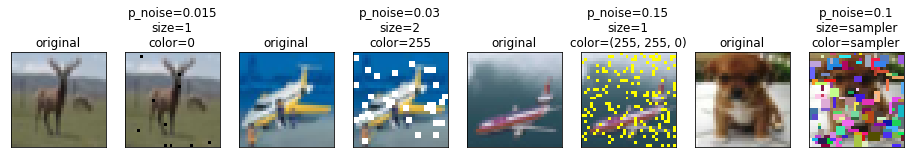

In [22]:
salt_generator=lambda: np.uint8(255*np.random.random(3))
size_generator=lambda: np.random.randint(1, 5, 2)
plot_examples(title = '',
              action = lambda batch, **params: batch.salt(**params),
              color=[0, 255, (255,255,0), salt_generator],
              p_noise=[0.015, 0.03, 0.15, 0.1],
              size=[1, 2, 1,size_generator])

# Put_on_background

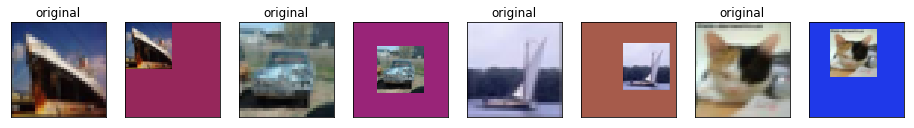

In [23]:
backgrounds = [(255*np.ones((64,64,3)) * np.random.random(3)).astype(np.uint8) for i in range(4)]
plot_examples(title = '',
              action = lambda batch, **params: batch.put_on_background(**params),
              background=backgrounds,
              origin=['top_left', 'center', 'random', 'random'],
              title_action=False)

# Pipeline example

In [24]:
def draw_batch_images(batch):
    f, a = plt.subplots(3, 6, figsize=(16, 8))
    for image, ai in zip(batch.images, a.flatten()):
        ai.imshow(image)

> Initialization and train pipelines

In [25]:
batch_size = 18
init_pipeline = (Pipeline()
         .init_variable('model_arch', ResNet18)
         .init_model('dynamic', V('model_arch'), 'model',
                     config = {'inputs' : {'images': {'shape': B('image_shape'),
                                                      'data_format': 'channels_last'},
                                           'labels': {'classes': 10,
                                                      'transform': 'ohe',
                                                      'name': 'targets'}},
                               'loss' : {'name' : 'crossentropy'},
                               'optimizer': {'name' : 'GradientDescent',
                                             'learning_rate' : 0.001},
                               'input_block/inputs' : 'images'}))

init_pipeline = init_pipeline << cifar_ds.train


train_pipeline = Pipeline().train_model('model',
                      feed_dict={'images': B('images'),
                                 'labels': B('labels')})

* By default, every element in a batch is transformed with parameters which are common for all elements in the batch (for example, angle=R('normal') first samples an angle then it rotates all images in the batch by equal angle). For example:

In [26]:
# here ``angle`` is sampled
augmentation_pipeline = Pipeline()\
                        .rotate(angle=R('normal', loc=0, scale=25))\
                        .crop(shape=(32, 32), origin='center')

pipeline = init_pipeline + augmentation_pipeline + train_pipeline

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



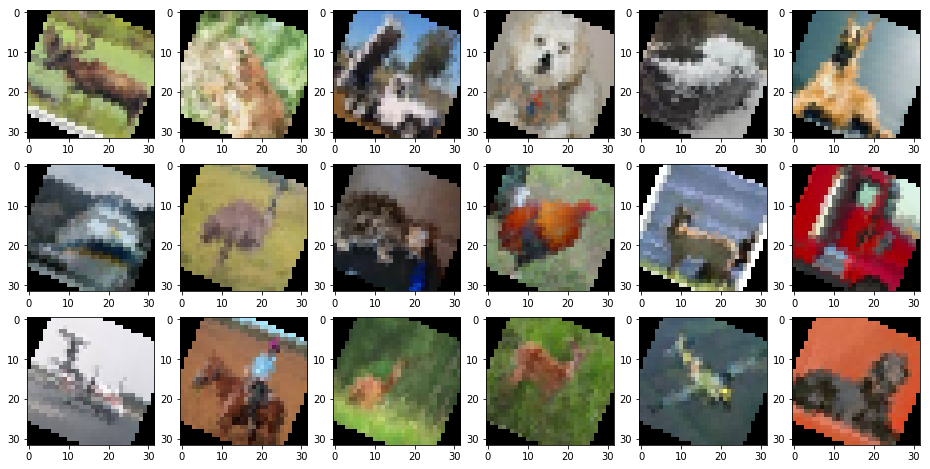

In [27]:
batch = pipeline.next_batch(batch_size=18, shuffle=True, n_epochs=None, drop_last=False)

# all images in ``batch`` are rotated by the equal angle
draw_batch_images(batch)

* To sample a parameter for every element, use ``P(R(...))`` named expression

In [28]:
# here angle is sampled for every element in a batch
# don't forget to crop images to the same size after rotation
augmentation_pipeline = Pipeline()\
                        .rotate(angle=P(R('normal', loc=0, scale=25)))\
                        .crop(shape=(32, 32), origin='center')

pipeline = init_pipeline + augmentation_pipeline + train_pipeline

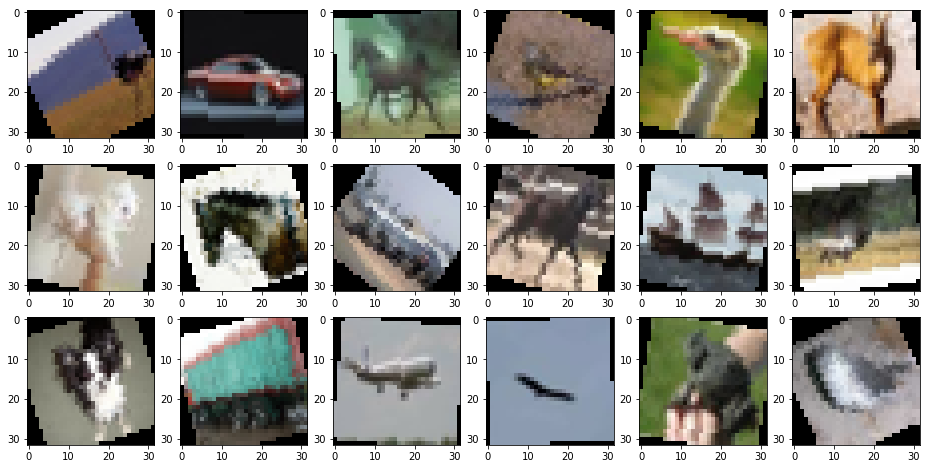

In [29]:
batch = pipeline.next_batch(batch_size=18, shuffle=True, n_epochs=None, drop_last=False)

# now angle is random for every element in ``batch``
draw_batch_images(batch)

* You can stack several actions

In [30]:
# if you use custom generator then it must have ``size`` parameter
# which determines the number of values to sample
salt_generator = lambda size=1: 255*np.random.random(size=(size,3))

augmentation_pipeline = Pipeline()\
                        .salt(color=P(R(salt_generator)),
                                          p_noise=P(R('uniform', 0.01, 0.3)), p=0.5)\
                        .rotate(angle=P(R('normal', loc=0, scale=25)), p=0.5)\
                        .crop(shape=(32, 32), origin='center')

pipeline = init_pipeline + augmentation_pipeline + train_pipeline

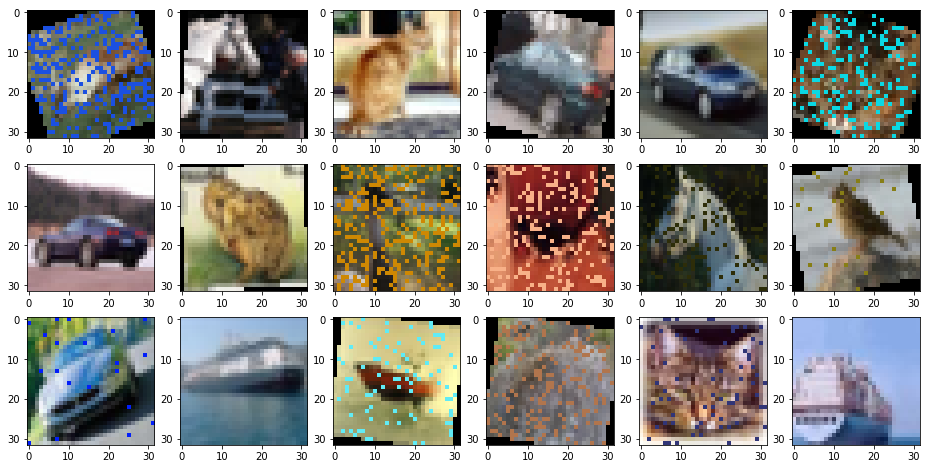

In [31]:
batch = pipeline.next_batch(batch_size=18, shuffle=True, n_epochs=None, drop_last=False)

draw_batch_images(batch)